# AI & Data Job Salaries – Exploratory Data Analysis

**Objective:** Analyze over 15,000 job listings in the AI and Data Science field to identify salary patterns, outliers, influencing variables, and differences across industries, roles, and work modes (e.g., remote vs onsite).

**Data Source:** [Global AI Job Market and Salary Trends 2025 – Kaggle](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data)

**Key Questions:**
- What are the highest-paying job roles?
- Is there a correlation between salary and factors such as experience, education, or company size?
- How does salary vary by employment type or remote ratio?
- Which jobs have extreme (outlier) salaries?
- How well do experience level and company size predict salary?

Analysis performed in Python using the following libraries: Pandas, Matplotlib, Seaborn, Scikit-learn.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Dataset Overview


In [2]:
df = pd.read_csv("../data/ai_job_dataset.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [4]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

# 2. Salary Distribution

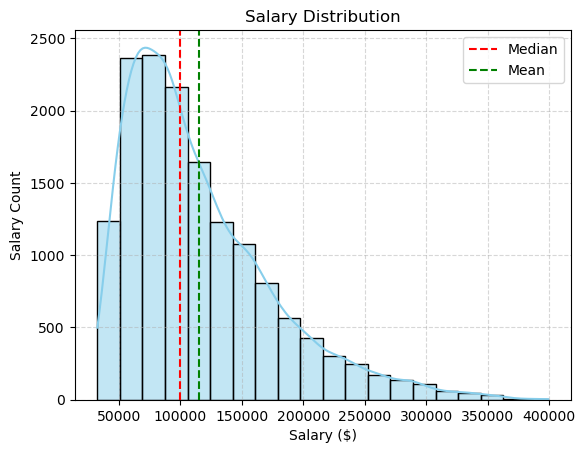

In [5]:
sns.histplot(df["salary_usd"],bins=20,kde=True,color="skyblue")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Salary ($)")
plt.ylabel("Salary Count")
plt.title("Salary Distribution")
plt.axvline(df["salary_usd"].median(), color='red', linestyle="--", label="Median")
plt.axvline(df["salary_usd"].mean(),color="green",linestyle="--",label="Mean")
plt.legend()
plt.show()

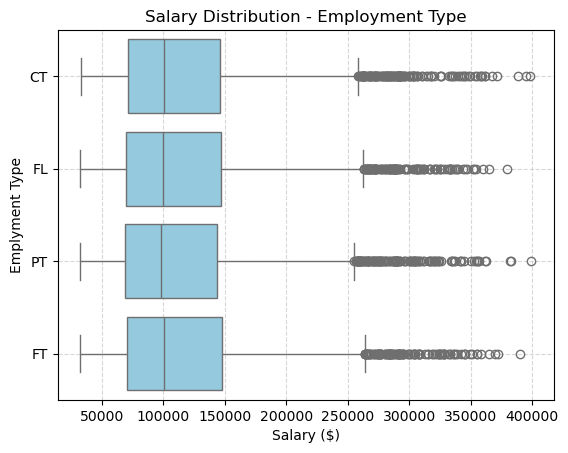

In [6]:
sns.boxplot(y=df["employment_type"],x=df["salary_usd"],color="skyblue")
plt.ylabel("Emplyment Type")
plt.xlabel("Salary ($)")
plt.title("Salary Distribution - Employment Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

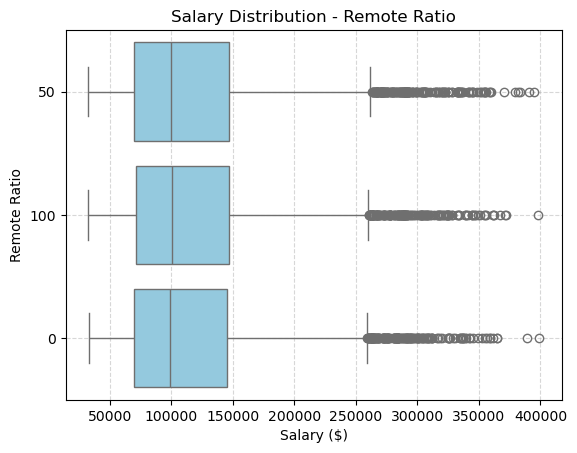

In [7]:
sns.boxplot(y=df["remote_ratio"].astype(str),x=df["salary_usd"],color="skyblue")
plt.ylabel("Remote Ratio")
plt.xlabel("Salary ($)")
plt.title("Salary Distribution - Remote Ratio")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 3. Salary by Industry

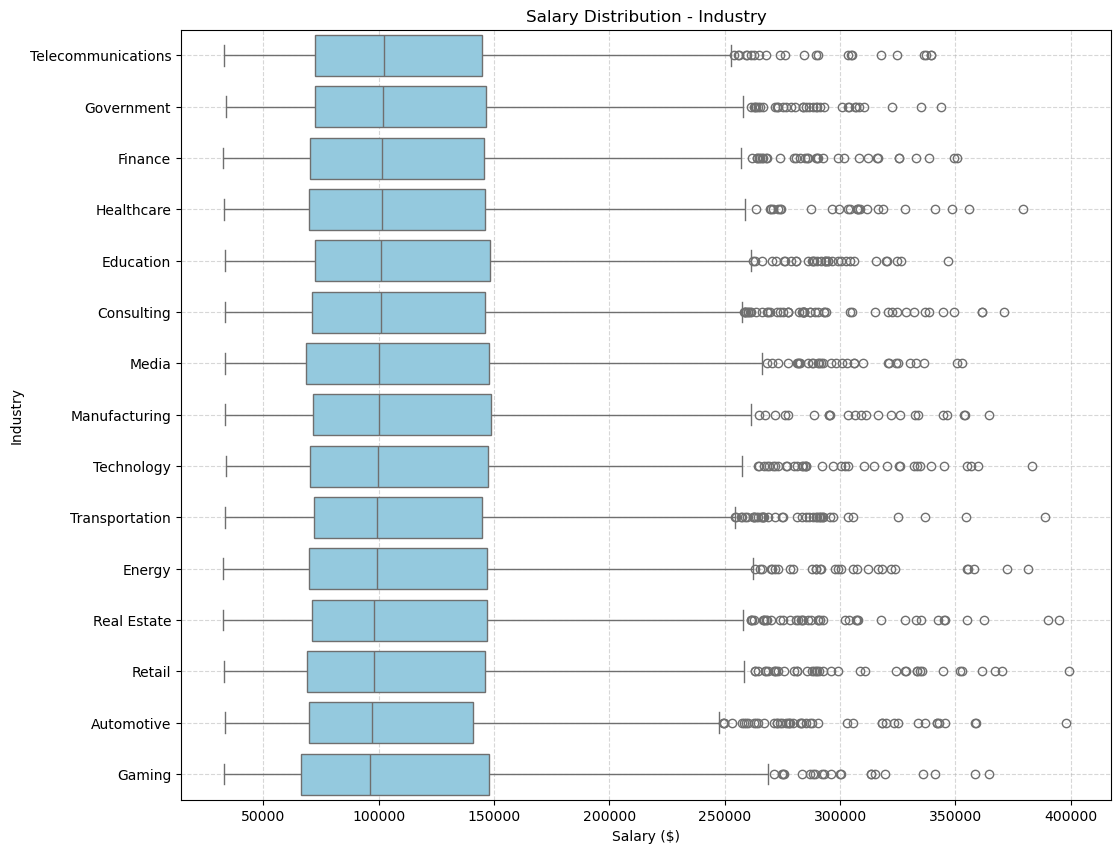

In [8]:
order = df.groupby("industry")["salary_usd"].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 10))
sns.boxplot(y="industry",x="salary_usd",data=df,order=order,showfliers=True,color="skyblue")

plt.title("Salary Distribution - Industry")
plt.xlabel("Salary ($)")
plt.ylabel("Industry")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 4. Outlier Detection & Analysis

In [9]:
Q1 = df["salary_usd"].quantile(0.25)
Q3 = df["salary_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 +1.5 * IQR

outliers = df[(df["salary_usd"] < lower_bound)|(df["salary_usd"] > upper_bound)]

In [10]:
outliers_job_title = outliers["job_title"].value_counts().head(10)
outliers_industry = outliers["industry"].value_counts().head(10)
outliers_employment_type = outliers["employment_type"].value_counts().head(10)
outliers_remote = outliers["remote_ratio"].value_counts().head(10)

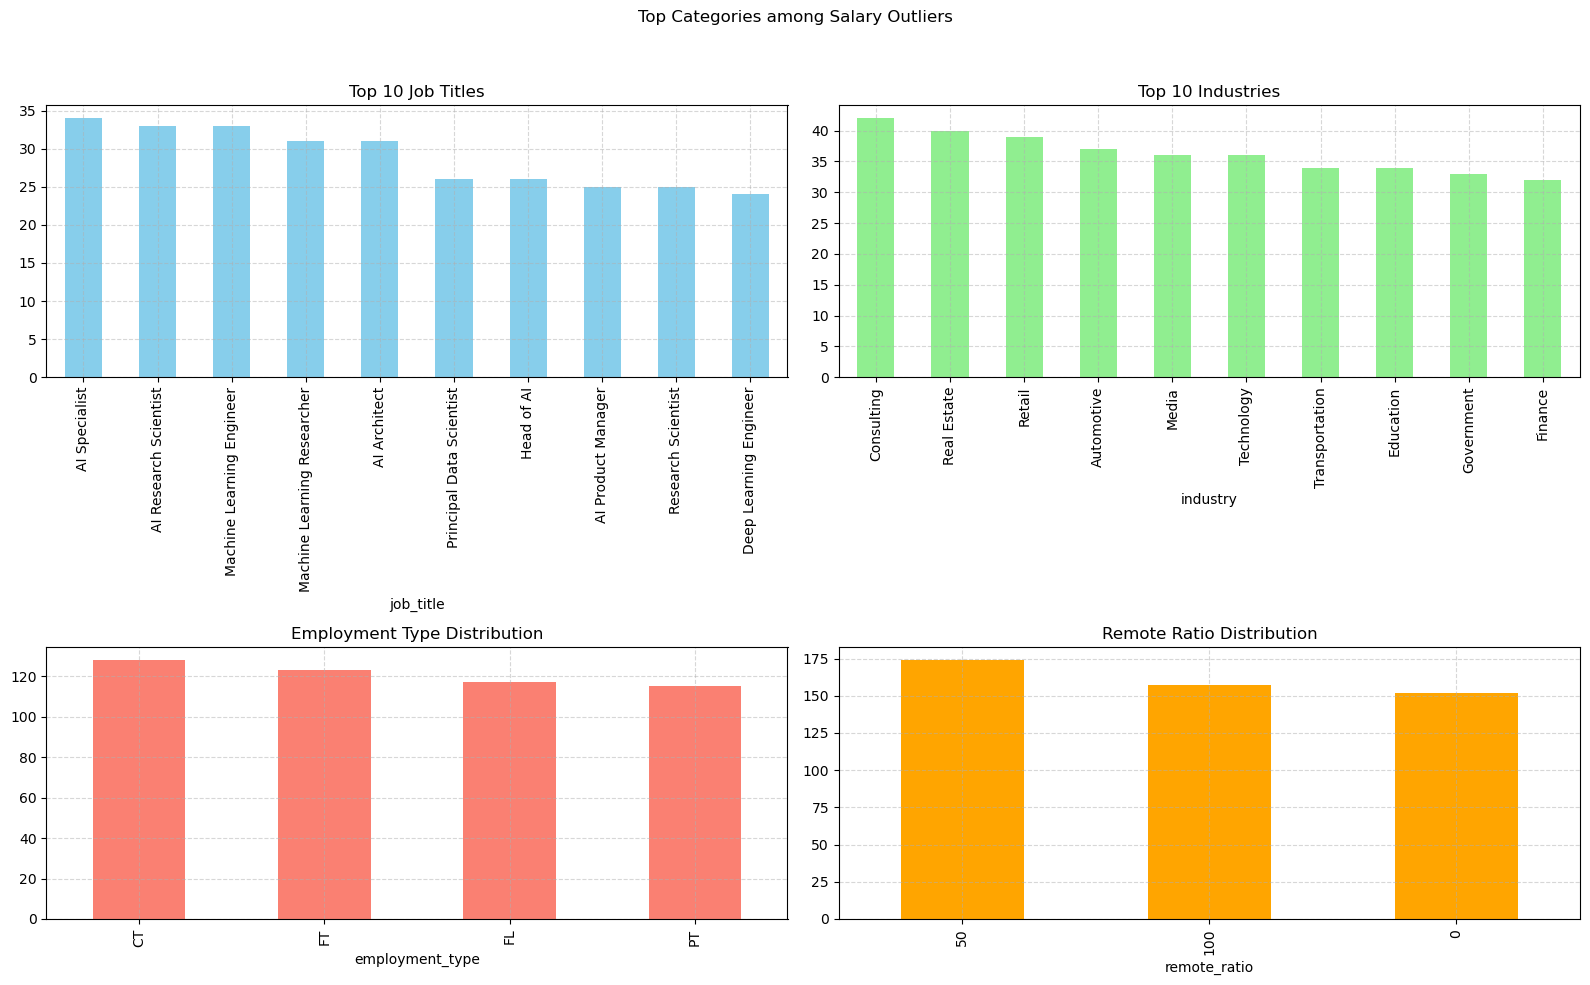

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Top Categories among Salary Outliers")

outliers_job_title.plot(kind="bar", ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Top 10 Job Titles")
axes[0, 0].grid(True, linestyle='--', alpha=0.5)

outliers_industry.plot(kind="bar", ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Top 10 Industries")
axes[0, 1].grid(True, linestyle='--', alpha=0.5)

outliers_employment_type.plot(kind="bar", ax=axes[1, 0], color="salmon")
axes[1, 0].set_title("Employment Type Distribution")
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

outliers_remote.plot(kind="bar", ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Remote Ratio Distribution")
axes[1, 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 5. Top Paying Job Titles

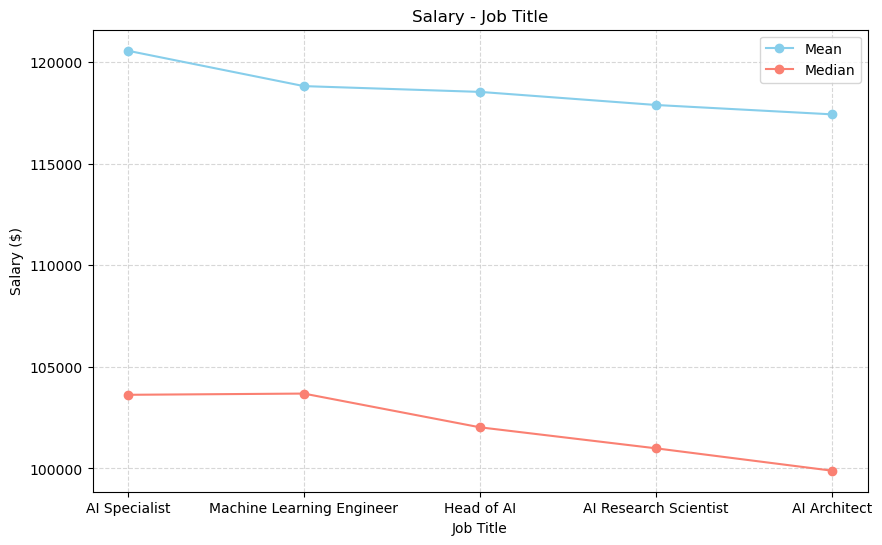

In [12]:
mean_salary = df.groupby("job_title")["salary_usd"].mean().sort_values(ascending=False).head(5)
median_salary = df.groupby("job_title")["salary_usd"].median().loc[mean_salary.index]

plt.figure(figsize=(10,6))
plt.plot(mean_salary,marker="o",label="Mean",color="skyblue")
plt.plot(median_salary,marker="o",label="Median",color="salmon")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Job Title")
plt.ylabel("Salary ($)")
plt.title("Salary - Job Title")
plt.legend()
plt.show()

# 6. Salary vs Benefits by Country

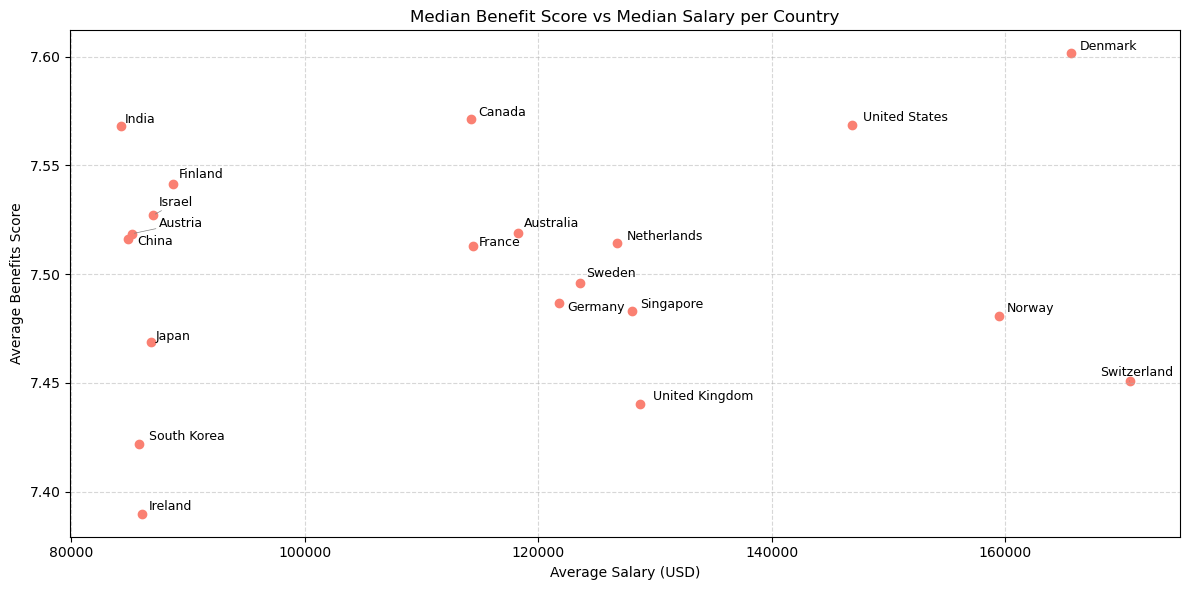

In [13]:
from adjustText import adjust_text

salary_mean_country = df.groupby("company_location")["salary_usd"].mean()
benefits_mean_country = df.groupby("company_location")["benefits_score"].mean()

plt.figure(figsize=(12, 6))
plt.scatter(salary_mean_country, benefits_mean_country,color="salmon")

texts = []
for country in salary_mean_country.index:
    x = salary_mean_country[country]
    y = benefits_mean_country[country]
    texts.append(
        plt.text(x, y, country, fontsize=9)
    )
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title("Median Benefit Score vs Median Salary per Country")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Average Benefits Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

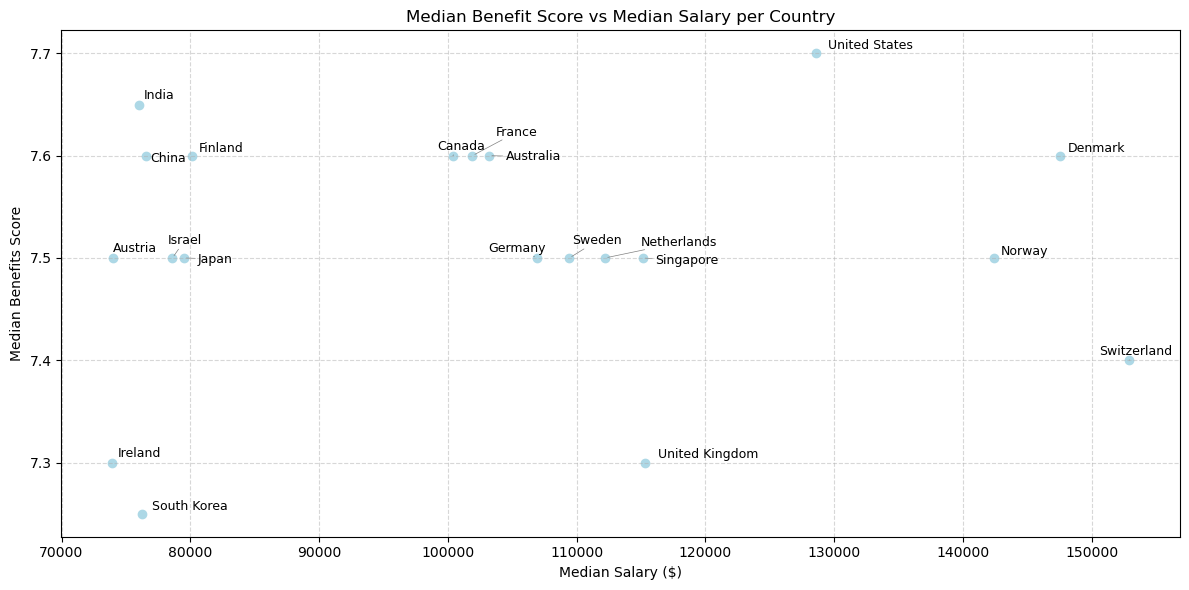

In [14]:
salary_median_country = df.groupby("company_location")["salary_usd"].median()
benefits_median_country = df.groupby("company_location")["benefits_score"].median()

plt.figure(figsize=(12, 6))
plt.scatter(salary_median_country, benefits_median_country,color="lightblue")

texts = []
for country in salary_mean_country.index:
    x = salary_median_country[country]
    y = benefits_median_country[country]
    texts.append(
        plt.text(x, y, country, fontsize=9)
    )
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.title("Median Benefit Score vs Median Salary per Country")
plt.xlabel("Median Salary ($)")
plt.ylabel("Median Benefits Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Correlation Analysis

In [15]:
df["experience_level_num"] = df["experience_level"].replace({"EN":1, "MI":2, "SE":3, "EX":4}).astype(int)
df["company_size_num"] = df["company_size"].replace({"S":1, "M":2, "L":3}).astype(int)
df["education_required_num"] = df["education_required"].replace({
    "Associate":1, "Bachelor":2, "Master":3, "PhD":4
}).astype(int)

In [16]:
df_corr = df[["salary_usd","years_experience","job_description_length","benefits_score","experience_level_num","company_size_num","education_required_num"]].astype(int)
correlation = df_corr.corr()

In [17]:
new_labels = [
    "Salary ($)",
     "Years Experience",
     "Job Description Length",
     "Benefits Score",
     "Experience Level",
     "Company Size",
     "Education Required"
]

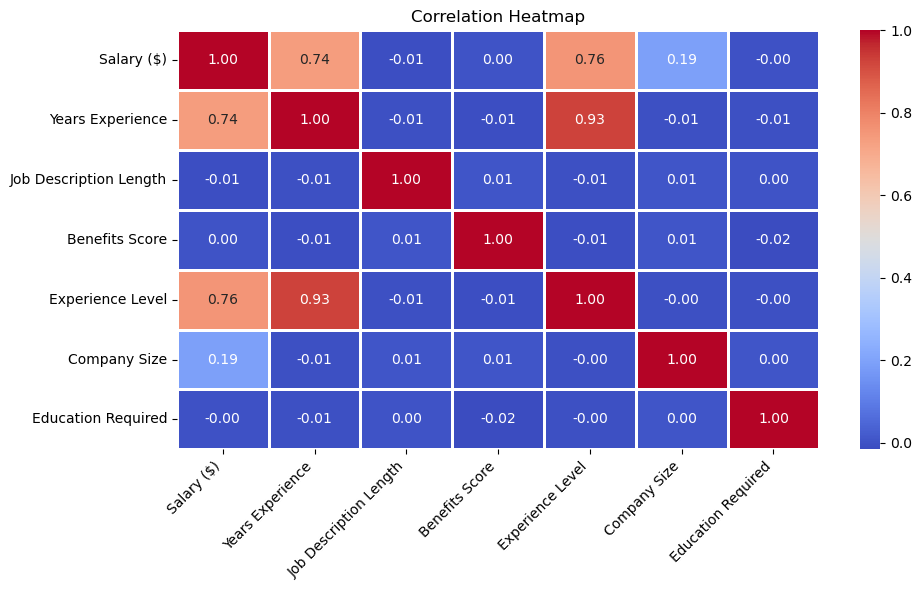

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(
    correlation,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    xticklabels=new_labels,
    yticklabels=new_labels,
    linewidths=1,
    linecolor='white',

)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


# 8. Linear Regression

In [19]:
X = df[["company_size_num","experience_level_num"]]
Y = df["salary_usd"]

regression = LinearRegression()
regression.fit(X,Y)

LinearRegression()

In [20]:
Y_pred = regression.predict(X)
r2 = r2_score(Y,Y_pred)
print("R² score:", r2_score(Y, Y_pred))

R² score: 0.610539117941695


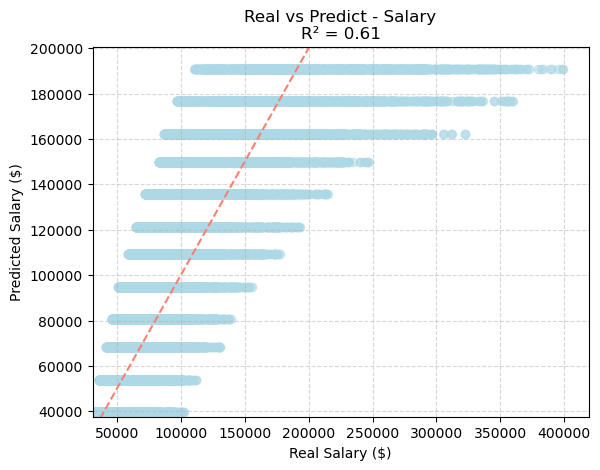

In [21]:
plt.scatter(Y,Y_pred,alpha=0.5,color="lightblue")
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],color="salmon",linestyle="--")

plt.ylim(Y_pred.min() * 0.95, Y_pred.max() * 1.05)
plt.xlim(Y.min() * 0.95, Y.max() * 1.05)
plt.grid(True, linestyle="--",alpha=0.5)
plt.xlabel("Real Salary ($)")
plt.ylabel("Predicted Salary ($)")
plt.title(f"Real vs Predict - Salary\nR² = {r2:.2f}")
plt.show()

# Final Conclusions

- **Right-skewed salary distribution**: The majority of AI/Data roles pay between **50k–150k**, with a long tail of high-paying outliers reaching up to **400k**.

- **Top-paying roles**: Among the highest compensated titles are **AI Specialist**, **Machine Learning Engineer**, **AI Architect**, **Principal Data Scientist**, and **Head of AI**.

- **What influences salary?**  
  The strongest positive correlation is with **experience level** (≈ 0.76), confirming that senior and executive roles earn significantly more. **Company size** shows a moderate impact (≈ 0.19), with larger companies typically paying better. In contrast, **education level** and **benefits score** have negligible correlation, suggesting they are not key salary drivers in this dataset.

- **Industry patterns**: Sectors like **Consulting**, **Finance**, and **Technology** have the highest median salaries, with **Telecommunications**, **Healthcare**, and **Government** also above average.

- **Remote roles aren’t necessarily highest-paid**: While many high-paying jobs are fully remote (100%), remote jobs in general do not always offer top-tier compensation compared to onsite roles.

- **Outliers profile**:
  - High-paying outliers are most common in executive/senior positions such as Machine Learning Engineer, AI Specialist, and roles in Consulting and Finance.
  - A significant share of outliers comes from full-time and contract roles in large companies.

- **Regression baseline results**:
  - A simple linear regression using only **experience level** and **company size** yields **R² ≈ 0.61**, explaining ~61% of salary variability.
  - This suggests experience and company size are strong predictors, but there's ~39% variance left unexplained likely due to factors like **job location (city)**, **specific skills**, or **company reputation**.